In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [333]:
GDP_per_capita = pd.read_csv("C:/Users/anton/OneDrive - Chalmers/Läsår 2/DAT405 - AI/life-expectancy.csv")
life_expect = pd.read_csv("C:/Users/anton/OneDrive - Chalmers/Läsår 2/DAT405 - AI/maddison-data-gdp-per-capita-in-2011us.csv")
GDP = pd.read_csv("C:/Users/anton/OneDrive - Chalmers/Läsår 2/DAT405 - AI/gdp-in-british-pounds.csv")

In [334]:
d = GDP_per_capita.merge(life_expect, on=('Year', 'Entity'))
d = d.merge(GDP, on=('Year', 'Entity'))
reduced_d = d[d.Year == 2000]
reduced_d.rename(columns={'GDP (Fouquin and Hugot (CEPII 2016))': 'GDP'}, inplace = True)
reduced_d

C:\Users\anton\AppData\Local\Temp\ipykernel_15664\1289279149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_d.rename(columns={'GDP (Fouquin and Hugot (CEPII 2016))': 'GDP'}, inplace = True)


,Entity,Code_x,Year,Life expectancy at birth (historical),Code_y,GDP per capita,417485-annotations,Code,GDP
98,Albania,ALB,2000,75.4,ALB,4808.4795,NaN,ALB,2.400530e+09
163,Algeria,DZA,2000,70.5,DZA,6834.5537,NaN,DZA,3.621245e+10
203,Angola,AGO,2000,46.0,AGO,2013.6362,NaN,AGO,6.034059e+09
281,Argentina,ARG,2000,73.9,ARG,14368.9420,NaN,ARG,1.878391e+11
306,Armenia,ARM,2000,70.6,ARM,5139.8257,NaN,ARM,1.263412e+09
...,...,...,...,...,...,...,...,...,...
9882,Venezuela,VEN,2000,72.5,VEN,13992.6080,NaN,VEN,7.742649e+10
9942,Vietnam,VNM,2000,72.5,VNM,2773.1016,NaN,VNM,2.223377e+10
9967,Yemen,YEM,2000,62.6,YEM,4212.1055,NaN,YEM,6.368957e+09
10031,Zambia,ZMB,2000,45.2,ZMB,1428.5024,NaN,ZMB,2.379803e+09


Text(0.5, 1.0, 'Scatter plot')

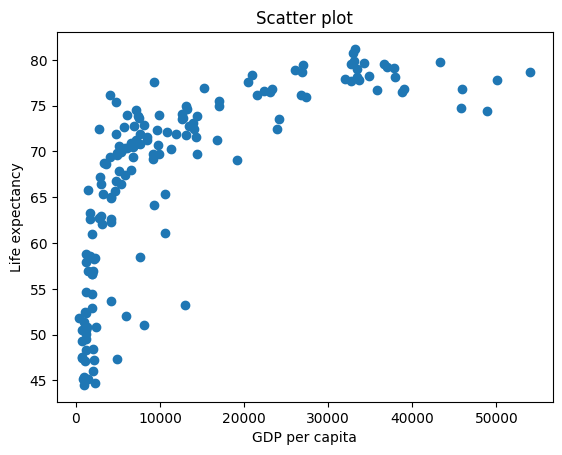

In [335]:
x,y = reduced_d['GDP per capita'], reduced_d['Life expectancy at birth (historical)']
plt.scatter(x,y)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('Scatter plot')

**b) Which countries have a life expectancy higher than one standard deviation above the mean?**

In [336]:
std_exp = np.std(a=reduced_d['Life expectancy at birth (historical)'])
mean_exp = np.mean(a=reduced_d['Life expectancy at birth (historical)'])
mean_std_exp = mean_exp + std_exp

In [337]:
return_list = []
for i, r in reduced_d.iterrows():
    country = r["Entity"]
    life_exp = r['Life expectancy at birth (historical)']
    if life_exp > mean_std_exp:
        return_list.append(country)
return_list

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Costa Rica',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom']

**c) Which countries have high life expectancy but have low GDP? Motivate how you have chosen to define “high” and “low”.**

In [338]:
std_gdp = np.std(a=reduced_d['GDP'])
mean_gdp = np.mean(a=reduced_d['GDP'])

std_exp = np.std(a=reduced_d['Life expectancy at birth (historical)'])
mean_exp = np.mean(a=reduced_d['Life expectancy at birth (historical)'])

mean_std_exp = mean_exp + std_exp
mean_std_gdp = mean_gdp - std_gdp


In [339]:
return_list = []
for i, r in reduced_d.iterrows():
    country = r["Entity"]
    life_exp = r['Life expectancy at birth (historical)']
    gdp = r['GDP']
    if life_exp > mean_std_exp and gdp < mean_std_gdp:
        return_list.append(country)
return_list

[]

Answer: No countries fit our criteria. For life expectancy we have decided to define "high" as 1 standard deviation above the mean. For GDP we have decided to define "low" as 1 standard deviation below the mean.

**d) Does every strong economy (normally indicated by GDP) have high life expectancy?**

In [340]:
std_gdp = np.std(a=reduced_d['GDP'])
mean_gdp = np.mean(a=reduced_d['GDP'])

std_exp = np.std(a=reduced_d['Life expectancy at birth (historical)'])
mean_exp = np.mean(a=reduced_d['Life expectancy at birth (historical)'])

mean_std_gdp = mean_gdp + std_gdp
mean_std_exp = mean_exp + std_exp

In [341]:
return_list_high = []
return_list_low = []
for i, r in reduced_d.iterrows():
    country = r["Entity"]
    life_exp = r['Life expectancy at birth (historical)']
    gdp = r['GDP']
    if gdp > mean_std_gdp:
        if life_exp > mean_std_exp:
            return_list_high.append(country)
        else:
            return_list_low.append(country)

In [342]:
tot_len = len(return_list_low + return_list_high)

percentage = len(return_list_high)/tot_len
print(f'Percentage of countries with high life expectancy and high GDP is {round(percentage*100, 2)}%')

Percentage of countries with high life expectancy and high GDP is 71.43%


Answer: Yes, mostly. 71,43% of the countries with high GDP have high life expectancy, indicating a weak correlation.  

**e) Related to question d, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of d and e.**

In [343]:
std_gdp = np.std(a=reduced_d['GDP per capita'])
mean_gdp = np.mean(a=reduced_d['GDP per capita'])

std_exp = np.std(a=reduced_d['Life expectancy at birth (historical)'])
mean_exp = np.mean(a=reduced_d['Life expectancy at birth (historical)'])

mean_std_gdp = mean_gdp + std_gdp
mean_std_exp = mean_exp + std_exp

In [344]:
return_list_high = []
return_list_low = []
for i, r in reduced_d.iterrows():
    country = r["Entity"]
    life_exp = r['Life expectancy at birth (historical)']
    gdp = r['GDP per capita']
    if gdp > mean_std_gdp:
        if life_exp > mean_std_exp:
            return_list_high.append(country)
        else:
            return_list_low.append(country)

In [345]:
tot_len = len(return_list_low + return_list_high)

percentage = len(return_list_high)/tot_len
print(f'Percentage of countries with high life expectancy and high GDP per capita is {round(percentage*100, 2)}%')

Percentage of countries with high life expectancy and high GDP is 72.41%


Answer: From our results GDP per capita and GDP are decent indicators of strong economies. A factor that GDP per capita/GDP doesn't concider, is where the money is coming from, if it's one indusry (eg oil) or multiple intustries. Having multiple strong industries are much prefered as it reduces the risk of an economic collapse. 

We tested with diffrent years and found that the percentage varies a lot. From the 1900s the percentage has stedily decreased, indicating weaker coorelation between strong economies and and life expectancy. This might be because either poor countries economies grow faster than their life expectancy, or that their life expectancy grow faster than the economy.

We used the same deviation every time (1 standart deviation), so that we could compare results between questions. 

We choose to reduce our dataset to one year to simplify the calculations. The year 2000 was chosen because it is recent and we had data for that year.


